In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
!python --version
!pip3 install seaborn
import seaborn as sns

Python 3.4.6
    100% |████████████████████████████████| 184kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 16.6MB 89kB/s  eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/ellieking/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [2]:
taxons = pd.read_csv('../../data/clean_taxons.csv')

In [3]:
content = pd.read_csv('../../data/clean_content.csv')

In [4]:
taxons = taxons[['base_path','content_id','taxon_name','level1taxon','level2taxon','level3taxon','level4taxon']]

In [29]:
content_taxons = pd.merge(
    left=content, 
    right=taxons, 
    left_on='taxon_id', 
    right_on='content_id', 
    how='outer', 
    indicator=True
)

In [14]:
content_taxons.head()

,Unnamed: 0,base_path_x,content_id_x,description,details,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,...,variable,taxon_id,base_path_y,content_id_y,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,4.0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,{},calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,10.0,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,{'introductory_paragraph': '<p>Use this tool t...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,78.0,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,{'introductory_paragraph': '<p>Calculate your ...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,95.0,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,{'introductory_paragraph': '<p>Calculate Statu...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,201278.0,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,{'parts': [{'slug': 'who-can-and-cant-ask-for-...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


## Tidy up columns

In [31]:
content_taxons.columns

Index(['Unnamed: 0', 'base_path_x', 'content_id_x', 'description', 'details',
       'document_type', 'first_published_at', 'locale',
       'primary_publishing_organisation', 'publishing_app', 'title', 'body',
       'combined_text', 'variable', 'taxon_id', 'base_path_y', 'content_id_y',
       'taxon_name', 'level1taxon', 'level2taxon', 'level3taxon',
       'level4taxon', '_merge'],
      dtype='object')

In [32]:
content_taxons = content_taxons.drop(['Unnamed: 0', 'variable', 'base_path_y', 'content_id_y', 'details' ], axis=1)

In [33]:
content_taxons.rename(columns={'base_path_x': 'base_path', 'content_id_x': 'content_id'}, inplace=True)

In [34]:
content_taxons.shape

(340457, 18)

In [26]:
content_taxons.shape

(334361, 23)

## Filter out rows which are duplicates, or mismatches from merge

In [40]:
print("There are {} rows in the data before filtering".format(content_taxons.shape[0]))
print("There are {} unique content items in the data before filtering".format(content_taxons.content_id.nunique()))
print("There are {} duplicates content items, both with matching content_id and taxon_id in the data before filtering".format(content_taxons[content_taxons.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 340457 rows in the data before filtering
There are 125968 unique content items in the data before filtering
There are 38410 duplicates content items, both with matching content_id and taxon_id in the data before filtering


In [41]:
content_taxons_filtered = content_taxons[content_taxons._merge == 'both']
print("There are {} rows in the taxon-level data after filtering out mismatches".format(content_taxons_filtered.shape[0]))
print("There are {} unique content items in the taxon-level data after filtering out mismatches".format(content_taxons_filtered.content_id.nunique()))

There are 335931 rows in the taxon-level data after filtering out mismatches
There are 125945 unique content items in the taxon-level data after filtering out mismatches


In [42]:
print("There were {} rows dropped because of mismatching".format(content_taxons.shape[0] - content_taxons_filtered.shape[0]))
print("There were {} unique content items dropped because of mismatching".format(content_taxons.content_id.nunique() - content_taxons_filtered.content_id.nunique()))

There were 4526 rows dropped because of mismatching
There were 23 unique content items dropped because of mismatching


In [43]:
print("There are {} duplicates content items, both with matching content_id and taxon_id in after removing mismatches".format(content_taxons_filtered[content_taxons_filtered.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 36222 duplicates content items, both with matching content_id and taxon_id in after removing mismatches


In [47]:
content_taxons_dedup = content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

In [46]:
content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

,base_path,content_id,description,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,title,body,combined_text,taxon_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,uk bank holidays,,uk bank holidays,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate holiday entitlement,,calculate holiday entitlement holiday calculat...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,maternity adoption and paternity calculator fo...,,maternity adoption and paternity calculator fo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate your employee's statutory sick pay,,calculate your employee's statutory sick pay s...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,training and study at work: your rights,,training and study at work: your rights your r...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
5,/giving-staff-time-off-jury-service,a4fa57a8-8a70-4b66-a7ba-22f5103b6378,what you can do if an employee is called up fo...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,giving staff time off for jury service,,giving staff time off for jury service what yo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
6,/employers-sick-pay,0374ee58-fd10-4e16-840e-cdaf6bbd2955,employer guide to statutory sick pay - ssp rat...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,statutory sick pay (ssp): employer guide,,statutory sick pay (ssp): employer guide emplo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
7,/recover-statutory-payments,abfde1c2-1e08-4eb0-98a4-2d2f65ba2016,reclaim statutory maternity paternity adoption...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,get financial help with statutory pay,,get financial help with statutory pay reclaim ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
8,/giving-staff-time-off-for-magistrate-duty,1e8c3bb8-2a63-46d5-9776-f0d3feed034e,how to give an employee time off to volunteer ...,answer,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,giving staff time off for magistrate duty,you must by law allow an employee who is a mag...,giving staff time off for magistrate duty how ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
9,/career-breaks,e1b8002b-a82c-4e03-8cff-02db4ab06b58,career breaks - eligibility and notice periods...,answer,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,career breaks,there are no laws that deal specifically with ...,career breaks career breaks - eligibility and ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


In [51]:
print("There were {} additional rows dropped due to duplicate content_id/taxon_id combination".format(content_taxons_filtered.shape[0] - content_taxons_dedup.shape[0]))
print("There were {} additional content items dropped due to duplicate content_id/taxon_id combination".format(content_taxons_filtered.content_id.nunique() - content_taxons_dedup.content_id.nunique()))

There were 36222 additional rows dropped due to duplicate content_id/taxon_id combination
There were 0 additional content items dropped due to duplicate content_id/taxon_id combination


## Top level taxons

Expecting 21 top taxons

In [53]:
print("There are {} unique taxon names in the level 1 taxon".format(content_taxons_dedup.level1taxon.nunique()))

There are 24 unique taxon names in the level 1 taxon


In [56]:
topfreq = content_taxons_dedup.groupby('level1taxon').size()
topfreq

level1taxon
Business                                         43530
Crime, justice and law                            2811
Defence                                           3969
Education, training and skills                    9128
Entering and staying in the UK                     293
Environment                                      21299
Going and being abroad                            1648
Government                                       21223
Health and social care                           13935
Housing, local and community                      9929
Imported Mainstream Browse                         712
Imported Policy Areas                            27435
Imported Policy Areas + Policies                 59329
Imported Topics                                   1935
International                                    11440
Life circumstances                                 240
Money                                             5672
Parenting, childcare and children's services      101

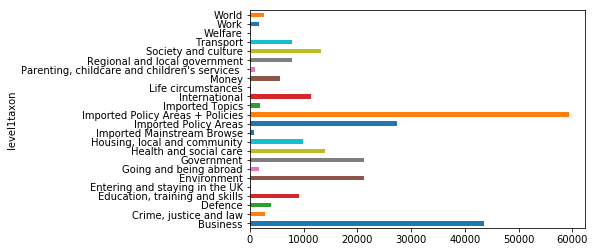

In [57]:
topfreq.plot(kind = 'barh')

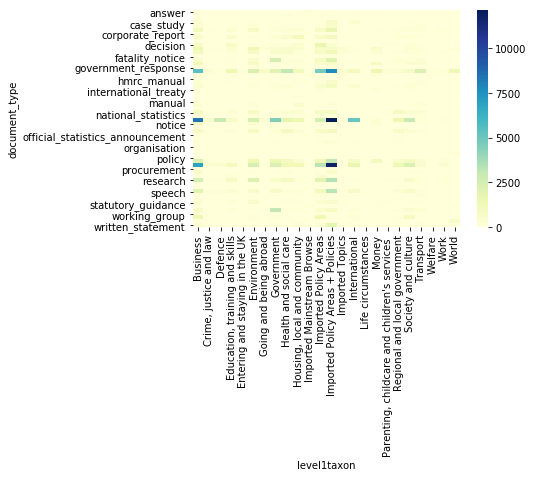

In [68]:
top_doctype = pd.crosstab(content_taxons_dedup['document_type'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_doctype, cmap = "YlGnBu")

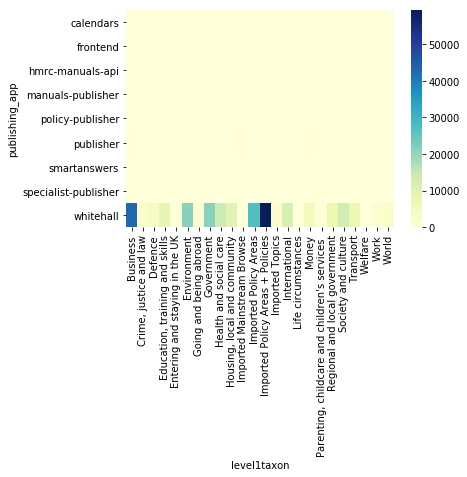

In [69]:
top_pubapp = pd.crosstab(content_taxons_dedup['publishing_app'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_pubapp, cmap = "YlGnBu")

In [78]:
pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,0.928096,0.443699,0.065597,0.462091
1,0.986279,0.403777,0.890451,0.078593
2,0.384656,0.962810,0.373414,0.434330
3,0.804028,0.532158,0.173102,0.964794
4,0.735803,0.987972,0.457839,0.441974
5,0.172120,0.670890,0.462029,0.074697
6,0.929129,0.307317,0.581195,0.506554
7,0.722963,0.358432,0.582239,0.491590
8,0.452789,0.037859,0.268028,0.067794
9,0.958420,0.737735,0.144344,0.552464


In [ ]:
content_taxons_dedup.groupby('level1taxon').size()

In [58]:
print("There are {} unique taxon names in the level 2 taxon".format(content_taxons_dedup.level2taxon.nunique()))

There are 364 unique taxon names in the level 2 taxon


In [59]:
second_freq = content_taxons_dedup.groupby('level2taxon').size()
second_freq

level2taxon
Adoption, fostering and surrogacy                67
Afghanistan and the UK                           11
Albania and the UK                               13
Algeria and the UK                               10
American Samoa and the UK                         1
Andorra and the UK                                4
Angola and the UK                                 8
Anguilla and the UK                               3
Antigua and Barbuda and the UK                   13
Argentina and the UK                             19
Armenia and the UK                               10
Arts and culture                               1339
Aruba and the UK                                  3
Asylum                                           21
Australia and the UK                             20
Austria and the UK                               20
Aviation                                        246
Azerbaijan and the UK                            11
Bahamas and the UK                               11


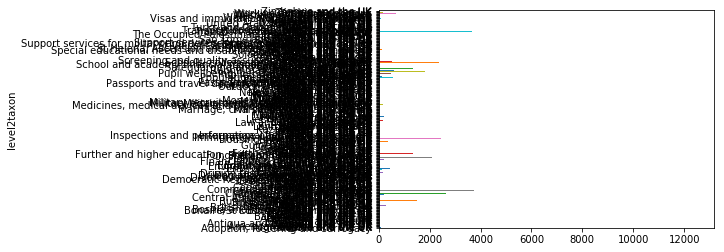

In [60]:
second_freq.plot(kind = 'barh')

## Checking that all items tagged to lower level have a label in toptaxon and secondtaxon

In [64]:
level1_2 = pd.crosstab(content_taxons_dedup['level1taxon'], content_taxons_dedup['level2taxon'])

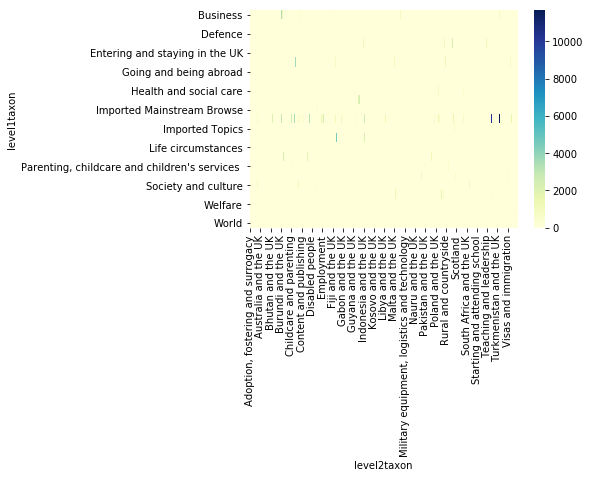

In [66]:
sns.heatmap(level1_2, cmap = "YlGnBu")